# Understanding the Perceptron: A Complete Guide

## Introduction

The perceptron is the fundamental building block of neural networks, introduced by Frank Rosenblatt in 1958. It's a binary classifier that makes its predictions based on a linear combination of input features followed by a step function.

## Mathematical Foundation

### 1. Basic Structure

A perceptron takes multiple input signals $(x_1, x_2, ..., x_n)$ and produces a binary output:

$$ y = f(\sum\_{i=1}^n w_ix_i + b) $$

Where:

- $x_i$ are the input features
- $w_i$ are the weights
- $b$ is the bias term (also written as $w_0$)
- $f$ is the step activation function

### 2. Step Activation Function

The step function converts the weighted sum into a binary output:

$$
f(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

### 3. Decision Boundary

The perceptron creates a linear decision boundary in the feature space. For a 2D input space, this boundary is a line:

$$ w_1x_1 + w_2x_2 + b = 0 $$

Points on one side of this line are classified as 1, and points on the other side as 0.

### 4. Learning Algorithm

The perceptron learns through an iterative process:

1. **Initialize**: Start with random or zero weights and bias
2. **For each training example**:
   - Calculate predicted output: $\hat{y} = f(w^T x + b)$
   - Calculate error: $E = y - \hat{y}$
   - Update weights: $w_i = w_i + \alpha E x_i$
   - Update bias: $b = b + \alpha E$

Where $\alpha$ is the learning rate that controls the size of weight updates.

### 5. Convergence

The perceptron learning algorithm is guaranteed to converge if:

- The data is linearly separable
- The learning rate is sufficiently small
- Enough iterations are performed

This is known as the Perceptron Convergence Theorem.

### 6. Limitations

1. **Linear Separability**: The perceptron can only learn linearly separable patterns. It cannot solve problems like XOR.
2. **Binary Output**: The standard perceptron only produces binary outputs, limiting its use to binary classification.
3. **Sensitivity**: The algorithm is sensitive to the order of training examples and the choice of learning rate.

### 7. Historical Significance

The perceptron's limitations, particularly its inability to solve non-linearly separable problems, led to:

- Development of multilayer perceptrons (MLPs)
- Discovery of the backpropagation algorithm
- Modern deep learning architectures

## Implementation

In the following notebook, we'll implement a perceptron from scratch and visualize its decision boundary. We'll:

1. Generate synthetic data
2. Implement the perceptron algorithm
3. Train the model
4. Visualize the results

This implementation will demonstrate the perceptron's ability to find a linear decision boundary that separates two classes of data points.


In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Implementation

The perceptron is one of the simplest forms of artificial neural networks. It's a binary classifier that makes predictions based on a linear combination of input features.

First, let's import the required libraries:

- `sklearn.datasets`: For generating synthetic classification data
- `numpy`: For numerical computations
- `matplotlib`: For visualization


In [ ]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

# Generate Synthetic Data

We'll create a synthetic binary classification dataset using `make_classification`:

- `n_samples=100`: Number of data points
- `n_features=2`: Two features for 2D visualization
- `n_classes=2`: Binary classification
- `class_sep=10`: High class separation for clear visualization
- `random_state=41`: For reproducibility


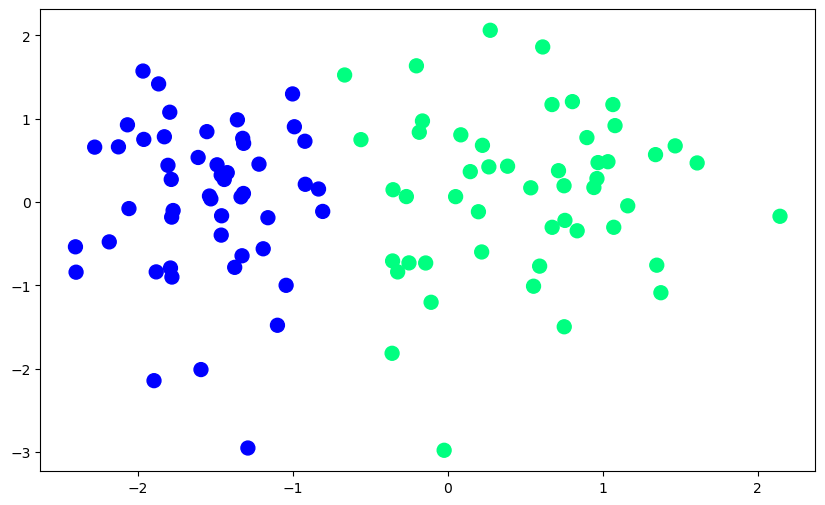

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)

plt.show()

# Visualize the Data

Let's plot our generated data points. The scatter plot will show:

- Two classes in different colors (using winter colormap)
- Points plotted in 2D space using the two features
- Size of points set to 100 for better visibility


In [10]:
def step(z):
    return 1 if z > 0 else 0

# Step Function (Activation Function)

The step function is the activation function used in the perceptron. It's defined as:

$$
f(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

This binary output determines the class prediction of the perceptron.


In [11]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]

# Perceptron Learning Algorithm

The perceptron algorithm learns the weights through these steps:

1. Add bias term (intercept) to input: $X' = [1, X]$
2. Initialize weights: $w = [w_0, w_1, w_2]$
3. For each iteration:
   - Select random sample $(x_i, y_i)$
   - Calculate prediction: $\hat{y} = f(w^T x_i)$
   - Update weights: $w = w + \alpha(y_i - \hat{y})x_i$

Where:

- $\alpha$ is the learning rate (0.1)
- $w_0$ is the bias term
- $w_1, w_2$ are feature weights
- $y_i$ is the true label
- $\hat{y}$ is the predicted label


In [12]:
intercept_, coef_ = perceptron(X, y)

# Train the Perceptron

Train the perceptron on our data to get:

- intercept\_ (bias term $w_0$)
- coef\_ (weights $[w_1, w_2]$)


In [13]:
print(coef_)
print(intercept_)

[1.24488004 0.04106956]
1.0


In [18]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Calculate Decision Boundary

The perceptron's decision boundary is a line defined by the equation:
$w_1x_1 + w_2x_2 + w_0 = 0$

We can rearrange this to slope-intercept form $(y = mx + b)$:
$x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$

Where:

- $m = -\frac{w_1}{w_2}$ is the slope
- $b = -\frac{w_0}{w_2}$ is the y-intercept


In [19]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

# Generate Points for Decision Boundary Line

Create points for plotting the decision boundary:

- Generate x-coordinates in range [-3, 3]
- Calculate corresponding y-coordinates using $y = mx + b$


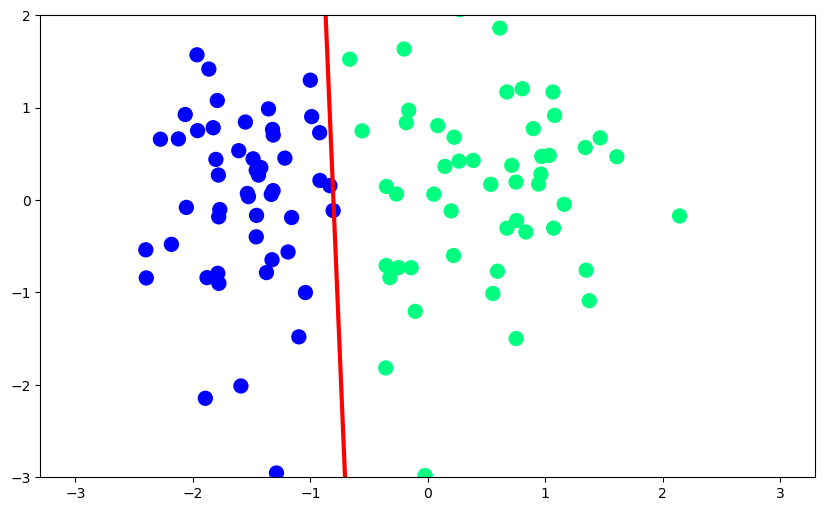

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.ylim(-3, 2)

plt.show()

# Visualize Data with Decision Boundary

Final visualization showing:

- Scatter plot of data points (two classes in different colors)
- Red line showing the decision boundary
- The decision boundary separates the two classes
- Points above the line are classified as one class, points below as the other
